<a href="https://colab.research.google.com/github/Alexdr1221/OIT-CST407-2/blob/main/TorchTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("GPU")
else:
  device = torch.device("cpu")
  print("CPU")

GPU


In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Image is 28x28 so 748 total pixels
        self.input_layer = nn.Linear(784, 64)
        self.hidden_layer1 = nn.Linear(64, 64)
        self.hidden_layer2 = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, 10)

    def forward(self, data):
        data = F.relu(self.input_layer(data))
        data = F.relu(self.hidden_layer1(data))
        data = F.relu(self.hidden_layer2(data))
        data = self.output_layer(data)

        return F.log_softmax(data, dim=1)


In [14]:
# download the testing and training datasets
training = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

# Import the testing and datasets into code
train_set = torch.utils.data.DataLoader(training, batch_size=50, shuffle=True)
test_set = torch.utils.data.DataLoader(testing, batch_size=100, shuffle=True)


In [15]:
  # Initialize the network and set parameters
network = Network().to(device)
learn_rate = optim.Adam(network.parameters(), lr=0.005) # Mess with lr to get best results
epochs = 10  # Number of training cycles for the network


In [19]:
# Train the network
print('Training network...')
for i in tqdm(range(epochs)):
    for data in train_set:
        # Get the image and the expected output
        image, output = data
        image = image.to(device)
        output = output.to(device)

        # Reset the network's gradient (makes each image unique)
        network.zero_grad()

        # Run the image through the network
        result = network(image.view(-1, 784)) # Export all data in a 784 entry array

        # How far off the network's guess is
        loss = F.nll_loss(result, output)

        # Update the network's weights through backward propagation
        loss.backward()
        learn_rate.step()
    print(loss)

Training network...


 10%|█         | 1/10 [00:24<03:42, 24.74s/it]

tensor(0.4206, device='cuda:0', grad_fn=<NllLossBackward0>)


 20%|██        | 2/10 [00:49<03:18, 24.83s/it]

tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)


 30%|███       | 3/10 [01:14<02:53, 24.84s/it]

tensor(0.2913, device='cuda:0', grad_fn=<NllLossBackward0>)


 40%|████      | 4/10 [01:39<02:29, 24.94s/it]

tensor(0.0268, device='cuda:0', grad_fn=<NllLossBackward0>)


 50%|█████     | 5/10 [02:04<02:04, 24.94s/it]

tensor(0.0422, device='cuda:0', grad_fn=<NllLossBackward0>)


 60%|██████    | 6/10 [02:29<01:39, 24.96s/it]

tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)


 70%|███████   | 7/10 [02:54<01:14, 24.94s/it]

tensor(8.1531e-05, device='cuda:0', grad_fn=<NllLossBackward0>)


 80%|████████  | 8/10 [03:19<00:49, 24.87s/it]

tensor(0.2492, device='cuda:0', grad_fn=<NllLossBackward0>)


 90%|█████████ | 9/10 [03:43<00:24, 24.75s/it]

tensor(0.7950, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 10/10 [04:08<00:00, 24.85s/it]

tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)


In [18]:
network.eval()

correct = 0
total = 0
with torch.no_grad():
    print('Running downloaded test set...')
    for data in test_set:
        # Get the image and the expected output
        image, output = data
        image = image.to(device)
        output = output.to(device)

        # Run the image through the network
        result = network(image.view(-1, 784)) # Export all data in a 784 entry array

        for index, tensor_value in enumerate(result):
            # For each result in the batch, check whether the guess was correct
            total += 1

            if torch.argmax(tensor_value) == output[index]:
                correct += 1

accuracy = (correct / total) * 100.0
print(f'Accuracy: {accuracy}%\n')

Running downloaded test set...
Accuracy: 96.16%



Testing Handwriting against a custom image


In [20]:
from PIL import Image
import numpy as np
import PIL.ImageOps
import torch
import matplotlib.pyplot as plt

from google.colab import drive

In [21]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Testing a custom image...


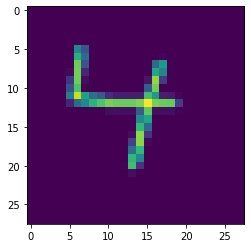

Guess: 4


In [22]:
print('Testing a custom image...')

img = Image.open('gdrive/My Drive/Test.png')
img = img.resize((28,28))
img = img.convert("L")
img = PIL.ImageOps.invert(img)

plt.imshow(img)
plt.show()

img = np.array(img)
img = img / 255
image = torch.from_numpy(img)
image = image.float().to(device)

result = network.forward(image.view(-1,28*28))
print(f'Guess: {torch.argmax(result)}')